In [106]:
import tensorflow as tf
from tensorflow import keras as ks
import matplotlib.pyplot as plt
import numpy as np

In [117]:
dir(ks.datasets)
# ks.datasets.mnist.load_data()

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'boston_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

In [108]:
dataset = ks.datasets.mnist.load_data()

In [109]:
(xtrain, ytrain), (xtest, ytest)= dataset
np.shape(xtrain[0])
xtrain[0].shape

(28, 28)

In [110]:
xtrain = xtrain / 255
xtest = xtest / 255

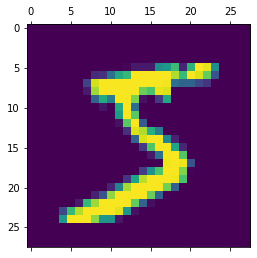

In [111]:
plt.matshow(xtrain[0])

In [112]:
ytrain[0]

5

In [113]:
flattened_xtrain = xtrain.reshape(len(xtrain), 28*28)
flattened_xtest = xtest.reshape(len(xtest), 28*28)
flattened_xtrain.shape

(60000, 784)

In [124]:
model = ks.Sequential([
    ks.layers.Dense(100, input_shape=(784, ), activation='relu'),
    ks.layers.Dense(10, activation='sigmoid')
])

In [125]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [126]:
model.fit(flattened_xtrain, ytrain, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2949 - accuracy: 0.9183
Epoch 2/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1374 - accuracy: 0.9595
Epoch 3/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1004 - accuracy: 0.9702
Epoch 4/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0788 - accuracy: 0.9760
Epoch 5/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0646 - accuracy: 0.9807
Epoch 6/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0523 - accuracy: 0.9836
Epoch 7/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0437 - accuracy: 0.9866
Epoch 8/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0362 - accuracy: 0.9890
Epoch 9/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0301 - accuracy: 0.9912
Epoch 10/10
60

In [127]:
model.evaluate(flattened_xtest, ytest)

10000/10000 [==============================] - 0s 35us/sample - loss: 0.0971 - accuracy: 0.9715


[0.0970517861037748, 0.9715]

In [128]:
y_predict = model.predict(flattened_xtest)

In [129]:
y_predict[8]

array([4.8998368e-17, 1.0510218e-15, 5.7460321e-09, 1.4563242e-15,
       4.5913377e-12, 1.9312155e-02, 1.0301317e-03, 6.0081486e-13,
       3.8929482e-08, 2.9041238e-11], dtype=float32)

In [130]:
np.argmax(y_predict[6])

4

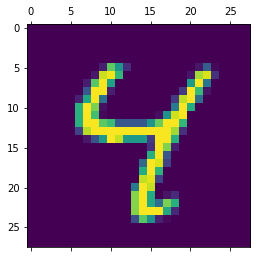

In [131]:
plt.matshow(xtest[6])

In [132]:
ypredicted_labels = [np.argmax(i) for i in y_predict]

In [133]:
ypredicted_labels[:5]

[7, 2, 1, 0, 4]

In [135]:
cm = tf.math.confusion_matrix(labels=ytest, predictions=ypredicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    0,    1,    2,    5,    3,    7,    1,    1],
       [   0, 1121,    3,    1,    0,    2,    2,    2,    4,    0],
       [   4,    1, 1000,    6,    3,    0,    3,    8,    7,    0],
       [   0,    0,    5,  964,    0,   24,    0,    7,    1,    9],
       [   0,    0,    4,    1,  951,    0,    4,    4,    1,   17],
       [   2,    0,    0,    4,    0,  880,    2,    1,    2,    1],
       [   1,    1,    4,    1,    6,   14,  928,    1,    2,    0],
       [   0,    1,    5,    4,    0,    0,    0, 1011,    1,    6],
       [   4,    0,    4,    3,    8,   13,    2,    7,  928,    5],
       [   1,    2,    0,    5,    7,   13,    0,    7,    2,  972]],
      dtype=int32)>

Text(69.0, 0.5, 'actual')

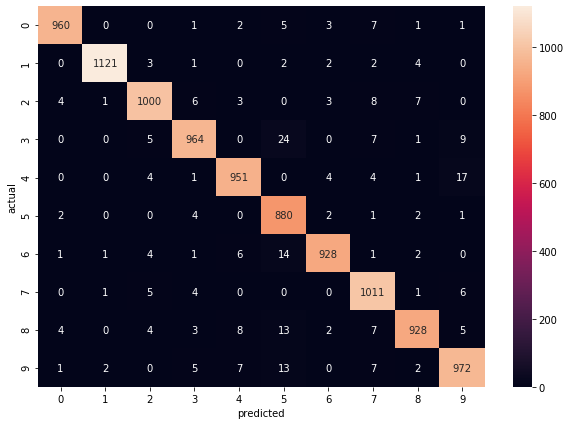

In [140]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')